In [2]:
from keras.datasets import mnist
import cv2
import numpy as np

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
random_num = np.random.randint(0, len(x_train))
img = x_train[random_num]
cv2.imshow("Random Sample: " + str(random_num), img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [11]:
imgs_rows = x_train[0].shape[0]
imgs_cols = x_train[0].shape[0]

print(imgs_rows, imgs_cols)

# Reshape to be valid for keras

x_train = x_train.reshape(x_train.shape[0], imgs_rows, imgs_cols, 1) 
x_test = x_test.reshape(x_test.shape[0], imgs_rows, imgs_cols, 1) 

# A tuple of the shape of a single images

input_shape = (imgs_rows, imgs_cols, 1)


# change our image data type to float32

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# normalize out data changing range from 0 - 255 to 0 - 1

x_train /= 255
x_test /= 255

28 28


In [12]:
# One Hot Encode

from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

num_classes = y_test.shape[1]
num_pixels= x_train.shape[1] * x_train.shape[2]

print("Number of classes: " + str(num_classes))
print("Number of pixels: " + str(num_pixels))

Number of classes: 10
Number of pixels: 784


# Create CNN Model

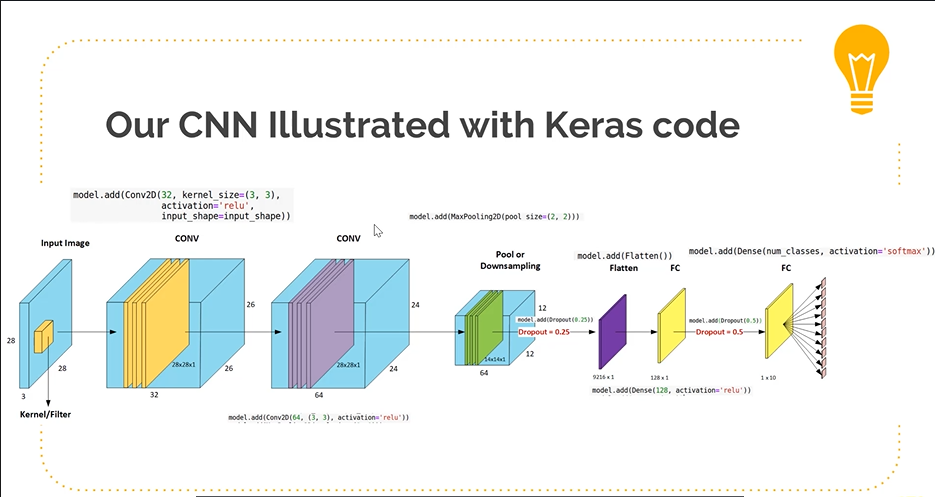

In [13]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K
from keras.optimizers import SGD

model = Sequential()

model.add(
    Conv2D(
        32, 
        kernel_size=(3, 3), 
        activation='relu',
        input_shape=input_shape
    )
)

model.add(
    Conv2D(
        64, 
        (3, 3), 
        activation='relu',
        input_shape=input_shape
    )
)

model.add(
    MaxPooling2D(
        pool_size=(2, 2)
    )
)

model.add(
    Dropout(0.25)
)

model.add(
    Flatten()
)

model.add(
    Dense(
        128, 
        activation='relu'
    )
)


model.add(
    Dropout(0.5)
)

model.add(
    Dropout(0.25)
)

model.add(
    Dense(
        num_classes, 
        activation='softmax'
    )
)

model.compile(
    loss='categorical_crossentropy',
    optimizer=SGD(0.01),
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)              

# Train the Model

In [35]:
batch_size = 16
epochs = 10
history = model.fit(
    x_train,
    y_train,
    batch_size = batch_size,
    epochs = epochs,
    verbose = 1,
    validation_data = (x_test, y_test)
)

Epoch 1/10
3750/3750 [==============================] - 57s 15ms/step - loss: 0.1612 - accuracy: 0.9524 - val_loss: 0.0640 - val_accuracy: 0.9783
Epoch 2/10
3750/3750 [==============================] - 67s 18ms/step - loss: 0.1335 - accuracy: 0.9607 - val_loss: 0.0542 - val_accuracy: 0.9825
Epoch 3/10
3750/3750 [==============================] - 79s 21ms/step - loss: 0.1114 - accuracy: 0.9671 - val_loss: 0.0464 - val_accuracy: 0.9857
Epoch 4/10
3750/3750 [==============================] - 76s 20ms/step - loss: 0.0976 - accuracy: 0.9708 - val_loss: 0.0443 - val_accuracy: 0.9850
Epoch 5/10
3750/3750 [==============================] - 77s 20ms/step - loss: 0.0892 - accuracy: 0.9730 - val_loss: 0.0412 - val_accuracy: 0.9862
Epoch 6/10
3750/3750 [==============================] - 77s 21ms/step - loss: 0.0797 - accuracy: 0.9763 - val_loss: 0.0405 - val_accuracy: 0.9865
Epoch 7/10
3750/3750 [==============================] - 76s 20ms/step - loss: 0.0763 - accuracy: 0.9768 - val_loss: 0.0349 -

In [23]:
score = model.evaluate(x_test, y_test, verbose=0)
print(
"Test Loss: ", score[0],  " - - - "
"Test Accuracy: ", score[1]
)

Test Loss:  0.08601262420415878  - - - Test Accuracy:  0.9735999703407288


# Plotting loss

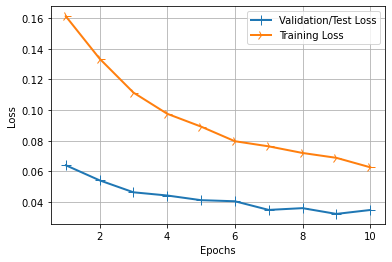

In [40]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()


# Plotting accuracy

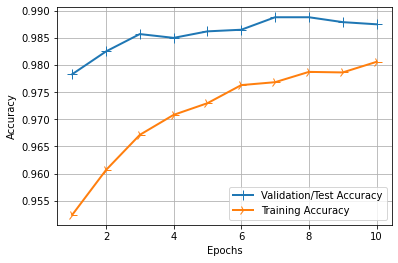

In [42]:
import matplotlib.pyplot as plt

history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)
line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()


# Save our model

In [46]:
model.save('MNIST_10_EPOCHS.h5')

In [49]:
from keras.models import load_model

classifier = load_model('MNIST_10_EPOCHS.h5')

# Using our model

In [102]:
import cv2
import numpy as np

def draw_test(name, pred, input_im):
    BLACK = [0, 0, 0]
    expanded_image = cv2.copyMakeBorder(input_im, 0, 0, 0, imageL.shape[0], cv2.BORDER_CONSTANT, value=BLACK)
    expanded_image = cv2.cvtColor(expanded_image, cv2.COLOR_GRAY2BGR)
    cv2.putText(expanded_image, str(pred), (152, 70), cv2.FONT_HERSHEY_COMPLEX_SMALL, 4, (0, 255, 0), 2)
    cv2.imshow(name, expanded_image)
    

for i in range(0, 10):
    rand = np.random.randint(0, len(x_test))
    input_im = x_test[rand]
    imageL = cv2.resize(input_im, None, fx=4, fy=4, interpolation=cv2.INTER_CUBIC)
    input_im = input_im.reshape(1, 28, 28, 1)
    prediction = str(np.argmax(model.predict(input_im)))
    draw_test("Prediction", prediction, imageL)
    cv2.waitKey(0)
    

cv2.destroyAllWindows()

# Plot model with plot_model

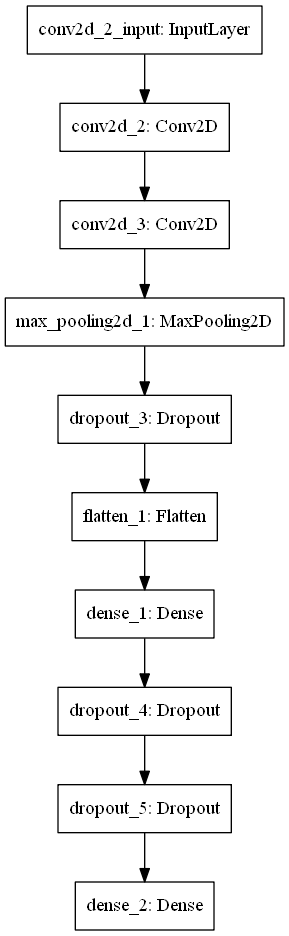

In [14]:
from keras.utils import plot_model

# conda install pydot

# conda install graphviz

plot_model(
    model,
    to_file="model.png",
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)